In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import os
os.chdir("C:\\Users\\tamil\\OneDrive\\Documents\\Python Directory")

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)


df = pd.read_csv("trainh.csv")
test = pd.read_csv("house_test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Primary information about data

In [2]:
# df.info()

In [3]:
print("Percentage of missing values")
print("============================")

for var in df.columns:
    if df[var].isna().sum() >1:
        miss = np.round(df[var].isna().sum()/df.shape[0] * 100,3)
        print(var, "has {0}% of missing values".format(miss))

Percentage of missing values
LotFrontage has 17.74% of missing values
Alley has 93.767% of missing values
MasVnrType has 0.548% of missing values
MasVnrArea has 0.548% of missing values
BsmtQual has 2.534% of missing values
BsmtCond has 2.534% of missing values
BsmtExposure has 2.603% of missing values
BsmtFinType1 has 2.534% of missing values
BsmtFinType2 has 2.603% of missing values
FireplaceQu has 47.26% of missing values
GarageType has 5.548% of missing values
GarageYrBlt has 5.548% of missing values
GarageFinish has 5.548% of missing values
GarageQual has 5.548% of missing values
GarageCond has 5.548% of missing values
PoolQC has 99.521% of missing values
Fence has 80.753% of missing values
MiscFeature has 96.301% of missing values


If it's not important remove the features which have more than 25% of missing value. Have to do imputation for below 25% of missing value variables during feature engineering.

# Analysing Target Variable

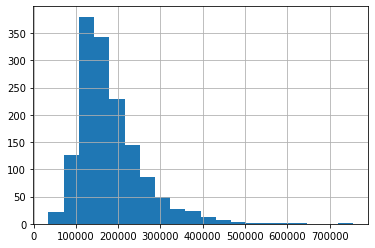

In [4]:
rcParams["figure.figsize"] = 6,4
target = df["SalePrice"]
target.hist(bins = 20)

Our target variable is right skewed, lets try to remove

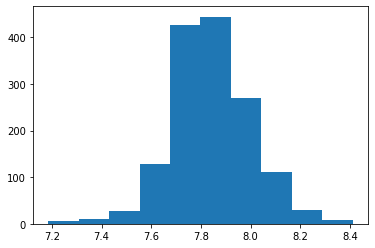

In [5]:
rcParams["figure.figsize"] = 6,4
from scipy import stats
target_bx,fitted_lambda = stats.boxcox(target)
plt.hist(target_bx);

# target_bx = np.log1p(target)
# plt.hist(target_bx);

We removed skewness in target variable

## Checking For Outliers

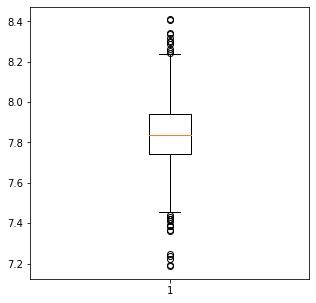

In [6]:
rcParams["figure.figsize"] = 5,5
plt.boxplot(target_bx)
plt.show()

There are many outliers. Though will remove by comparing the model

In [7]:
df["sale_log"] = target_bx.copy()

In [8]:
#Joining train and test data

df = df.drop(["SalePrice","sale_log"],axis = 1)
print(df.shape)
print(test.shape)

(1460, 80)
(1459, 80)


In [9]:
ntrain = len(df)
full_data = pd.concat([df,test],axis = 0)
full_data.shape

(2919, 80)

# Extracting Numerical And Categorical Data

In [10]:
#Extracting Numerical data and discrete data
df = full_data.copy()
num_var = [var for var in df.columns if df[var].dtype != "object"]
num_data = df[num_var]
print(num_data.shape)
num_data.head()

(2919, 37)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


There is mix of numeric and categorical data, we have to separate.

In [12]:
for var in num_data.columns:
    print("unique values in {0} is {1}".format(var,df[var].nunique()))

unique values in Id is 2919
unique values in MSSubClass is 16
unique values in LotFrontage is 128
unique values in LotArea is 1951
unique values in OverallQual is 10
unique values in OverallCond is 9
unique values in YearBuilt is 118
unique values in YearRemodAdd is 61
unique values in MasVnrArea is 444
unique values in BsmtFinSF1 is 991
unique values in BsmtFinSF2 is 272
unique values in BsmtUnfSF is 1135
unique values in TotalBsmtSF is 1058
unique values in 1stFlrSF is 1083
unique values in 2ndFlrSF is 635
unique values in LowQualFinSF is 36
unique values in GrLivArea is 1292
unique values in BsmtFullBath is 4
unique values in BsmtHalfBath is 3
unique values in FullBath is 5
unique values in HalfBath is 3
unique values in BedroomAbvGr is 8
unique values in KitchenAbvGr is 4
unique values in TotRmsAbvGrd is 14
unique values in Fireplaces is 5
unique values in GarageYrBlt is 103
unique values in GarageCars is 6
unique values in GarageArea is 603
unique values in WoodDeckSF is 379
uniqu

In [13]:
cat_in_num = ["MSSubClass","OverallQual","OverallCond","MoSold","YrSold"]
#Collected list of categorical variable presented in numerical data

#Droping categorical variable from the data
num_data = num_data.drop(cat_in_num,axis = 1)

#Removing ID from the data and sale price
num_data = num_data.drop(["Id"], axis = 1)

num_data.head() #It's not our final numerical variables, we need to check in cat. var if there is any num. data presented

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0
1,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0
2,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0
3,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0
4,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0


In [14]:
#Extracting Categorical Data

cat_data = df.drop(num_data.columns,axis = 1) #Var which is not present in num data will be stored
# cat_var.head()

#Removing Id and sale price
cat_data = cat_data.drop(["Id"], axis = 1)
cat_data.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


# 1.Analysing Numerical Data

In [15]:
num_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0
1,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0
2,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0
3,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0
4,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0


### 1.1 Feature Engineering For Numerical Data

In [16]:
current_year = 2020

#Creating New Feature "House Age"
num_data["AgeOfHouse"] = current_year - num_data["YearBuilt"]

#Creating New feature "AgeAftRemod"
num_data["AgeAftRemod"] = current_year - num_data["YearRemodAdd"]

#Creating New feature "GarageAge"
num_data["GarageAge"] = current_year - num_data["GarageYrBlt"]

#Creating new feature "TotalFlrSF"
num_data["TotalFlrSF"] = num_data["1stFlrSF"] + num_data["2ndFlrSF"]

num_data = num_data.drop(["YearBuilt","YearRemodAdd","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","GarageYrBlt"], axis = 1)

num_data.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeOfHouse,AgeAftRemod,GarageAge,TotalFlrSF
0,65.0,8450,196.0,856.0,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,17,17,17.0,1710
1,80.0,9600,0.0,1262.0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,44,44,44.0,1262
2,68.0,11250,162.0,920.0,0,1786,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,19,18,19.0,1786
3,60.0,9550,0.0,756.0,0,1717,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,105,50,22.0,1717
4,84.0,14260,350.0,1145.0,0,2198,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,20,20,20.0,2198


### 1.1.2 Handling Missing Values

In [17]:
for var in num_data.columns:
    if num_data[var].isnull().sum()/num_data.shape[0] > 0.25:
        print("dropping {0}".format(var))
    else:
        num_data[var] = num_data[var].fillna(num_data[var].median())

if num_data[var].isnull().sum() > 1:
    print("There is missing values")
else:
    print("There is no missing values")

There is no missing values


In [18]:
num_data.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeOfHouse,AgeAftRemod,GarageAge,TotalFlrSF
0,65.0,8450,196.0,856.0,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,17,17,17.0,1710
1,80.0,9600,0.0,1262.0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,44,44,44.0,1262
2,68.0,11250,162.0,920.0,0,1786,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,19,18,19.0,1786
3,60.0,9550,0.0,756.0,0,1717,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,105,50,22.0,1717
4,84.0,14260,350.0,1145.0,0,2198,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,20,20,20.0,2198


In [27]:
num_data = ((num_data - num_data.mean())/(num_data.max() - num_data.min()))
num_data.describe()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeOfHouse,AgeAftRemod,GarageAge,TotalFlrSF
count,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03
mean,1.961741e-17,2.184747e-18,8.234855e-17,1.000779e-17,5.216234e-17,1.333104e-17,1.631674e-17,3.042749e-19,6.986912e-17,5.990412e-17,6.074088e-17,-2.851983e-17,1.886504e-17,2.329605e-17,6.124483e-17,-1.573672e-18,-7.012585e-18,5.545663e-18,1.807345e-17,8.283349e-17,3.118105e-17,-2.697973e-17,-9.504133e-19,1.217100e-17,-2.487447e-17,1.048560e-17,6.636996e-18
std,7.300650e-02,3.686460e-02,1.117841e-01,7.212639e-02,4.360604e-02,9.533742e-02,1.748921e-01,1.228040e-01,1.382423e-01,2.514358e-01,1.028366e-01,7.148733e-02,1.207215e-01,1.615323e-01,1.523012e-01,1.447298e-01,8.885294e-02,9.107209e-02,6.348246e-02,4.958301e-02,9.754230e-02,4.457993e-02,3.337660e-02,2.195032e-01,3.482391e-01,7.970698e-02,9.488994e-02
min,-1.646863e-01,-4.145044e-02,-6.337252e-02,-1.721369e-01,-4.412045e-03,-2.198116e-01,-1.431997e-01,-3.066119e-02,-3.920007e-01,-1.901336e-01,-3.575283e-01,-3.481786e-01,-3.424250e-01,-1.492806e-01,-3.533402e-01,-3.177937e-01,-6.580747e-02,-6.399840e-02,-2.282443e-02,-5.122561e-03,-2.788602e-02,-2.814748e-03,-2.989763e-03,-2.803422e-01,-4.289254e-01,-7.334561e-01,-2.189272e-01
25%,-3.112461e-02,-1.257386e-02,-6.337252e-02,-4.234963e-02,-4.412045e-03,-7.060284e-02,-1.431997e-01,-3.066119e-02,-1.420007e-01,-1.901336e-01,-1.075283e-01,-1.484527e-02,-1.116557e-01,-1.492806e-01,-1.533402e-01,-1.027399e-01,-6.580747e-02,-6.399840e-02,-2.282443e-02,-5.122561e-03,-2.788602e-02,-2.814748e-03,-2.989763e-03,-2.151248e-01,-3.289254e-01,-7.319968e-02,-7.084880e-02
50%,-3.727351e-03,-3.342514e-03,-6.337252e-02,-1.018924e-02,-4.412045e-03,-1.069326e-02,-1.431997e-01,-3.066119e-02,1.079993e-01,-1.901336e-01,1.747174e-02,-1.484527e-02,-3.473265e-02,1.007194e-01,4.665982e-02,4.786954e-03,-6.580747e-02,-2.895797e-02,-2.282443e-02,-5.122561e-03,-2.788602e-02,-2.814748e-03,-2.989763e-03,-1.222624e-02,-1.455921e-01,-2.686861e-03,-1.056244e-02
75%,3.051922e-02,6.552553e-03,3.881498e-02,4.095642e-02,-4.412045e-03,4.573100e-02,1.901336e-01,-3.066119e-02,1.079993e-01,3.098664e-01,1.747174e-02,-1.484527e-02,4.219042e-02,1.007194e-01,4.665982e-02,6.930308e-02,5.217006e-02,3.034123e-02,-2.282443e-02,-5.122561e-03,-2.788602e-02,-2.814748e-03,-2.989763e-03,1.290781e-01,3.210746e-01,5.340288e-02,4.642701e-02
max,8.353137e-01,9.585496e-01,9.366275e-01,8.278631e-01,9.955880e-01,7.801884e-01,8.568003e-01,9.693388e-01,6.079993e-01,8.098664e-01,6.424717e-01,6.518214e-01,6.575750e-01,8.507194e-01,6.466598e-01,6.822063e-01,9.341925e-01,9.360016e-01,9.771756e-01,9.948774e-01,9.721140e-01,9.971853e-01,9.970102e-01,7.196578e-01,5.710746e-01,2.665439e-01,7.810728e-01


# 1.Analysing Categorical Data

In [22]:
cat_data.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


In [23]:
cat_data.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [24]:
#Checking value counts for each variables
for var in cat_data.columns:
    print("===============================")
    print("Value counts for {0} is \n".format(var), cat_data[var].value_counts())

Value counts for MSSubClass is 
 20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64
Value counts for MSZoning is 
 RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Value counts for Street is 
 Pave    2907
Grvl      12
Name: Street, dtype: int64
Value counts for Alley is 
 Grvl    120
Pave     78
Name: Alley, dtype: int64
Value counts for LotShape is 
 Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Value counts for LandContour is 
 Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
Value counts for Utilities is 
 AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Value counts for LotConfig is 
 Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, d

Remove street,utilities,condition2,RoofMatl,heating

There are many low no.of value_counts in the categorical data (DOUBT)

### Relationship Between Categorical Feature and Sale Price

In [25]:
# plt.figure(figsize=(7,5))
# for var in cat_data.columns:
#     sns.barplot(cat_data[var],target)
#     plt.xticks(rotation = 90)
#     plt.title(var)
#     plt.show()

There is no relationship between LandSlope and Sale Price

In [26]:
#Removing features which are biased towards particular class
cat_data = cat_data.drop(["LandSlope","Street","Utilities","Condition2","RoofMatl","Heating"], axis = 1)
cat_data.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,NaN,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,NaN,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,NaN,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,NaN,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,NaN,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


### 1.1 Feature Engineering For Categorical Data

#### Handling Missing Values

In [27]:
cat_data.isnull().sum()
cat_data.shape

(2919, 42)

In [28]:
for var in cat_data.columns:
    if cat_data[var].isnull().sum() > 50:
        print("dropping {0}".format(var))
        cat_data = cat_data.drop(var,axis = 1)
    else:
        cat_data[var] = cat_data[var].fillna(cat_data[var].mode())

# if cat_data[var].isnull().sum() > 1:
#     print("There is missing values")
# else:
#     print("There is no missing values")

dropping Alley
dropping BsmtQual
dropping BsmtCond
dropping BsmtExposure
dropping BsmtFinType1
dropping BsmtFinType2
dropping FireplaceQu
dropping GarageType
dropping GarageFinish
dropping GarageQual
dropping GarageCond
dropping PoolQC
dropping Fence
dropping MiscFeature


# Rare Values Imputation

In [29]:
cat_data.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,Y,SBrkr,Gd,Typ,Y,2,2008,WD,Normal
1,20,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Ex,Y,SBrkr,TA,Typ,Y,5,2007,WD,Normal
2,60,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,Y,SBrkr,Gd,Typ,Y,9,2008,WD,Normal
3,70,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,Gd,Y,SBrkr,Gd,Typ,Y,2,2006,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,Y,SBrkr,Gd,Typ,Y,12,2008,WD,Normal


In [30]:
from sklearn.preprocessing import LabelEncoder
col = ["MSZoning","HeatingQC","ExterQual","HouseStyle","LandContour","BldgType","KitchenQual","Condition1","ExterQual","ExterCond"]


# for var in col:
#     print(cat_data[var].value_counts())
#     print("=============================")


for var in col:
    enc = LabelEncoder()
    cat_data[var] = cat_data[var].astype(str)
    cat_data[var] = enc.fit_transform(cat_data[var])
    cat_data[var] = cat_data[var].astype(int)

In [31]:
cat_data_dummies  = pd.get_dummies(cat_data,drop_first=True)
cat_data_dummies.head()

,MSSubClass,MSZoning,LandContour,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,KitchenQual,MoSold,YrSold,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,3,3,2,0,5,7,5,2,4,0,2,2,2008,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,3,3,1,0,2,6,8,3,4,0,3,5,2007,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,3,3,2,0,5,7,5,2,4,0,2,9,2008,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,3,3,2,0,5,7,5,3,4,2,2,2,2006,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,3,3,2,0,5,8,5,2,4,0,2,12,2008,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [32]:
cat_data_dummies.shape

(2919, 113)

In [33]:
#Seperating train and test

data = pd.concat([num_data,cat_data_dummies],axis = 1)
data.shape

(2919, 140)

In [34]:
train = data[:ntrain]
train.shape

(1460, 140)

In [35]:
test = data[ntrain:]
test.shape

(1459, 140)

# LINEAR REGRESSION MODEL

In [36]:
X = train.values

Y = target_bx


# #Splitting train and test

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=100)

In [37]:
#Training the model
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.774e+05
Date:                Mon, 20 Apr 2020   Prob (F-statistic):                        0.00
Time:                        14:16:53   Log-Likelihood:                          1654.7
No. Observations:                1022   AIC:                                     -3041.
Df Residuals:                     888   BIC:                                     -2381.
Df Model:                         134                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -9.629e-05      0.000     -0.850      0.396      -0.000       0.000
x2          6.567e-07   2.09e-07      3.145      0.002    2.47e-07    1.07e-06
x3         -8.461e-06   1.39e-05     -0.611      0.541   -3.56e-05    1.87e-05
x4          2.277e-05   7.09e-06      3.213      0.001    8.86e-06    3.67e-05
x5          9.098e-06   2.62e-05      0.347      0.728   -4.23e-05    6.05e-05
x6          3.857e-05   1.39e-05      2.776      0.006    1.13e-05    6.58e-05
x7             0.0321      0.004      8.392      0.000       0.025       0.040
x8             0.0173      0.007      2.327      0.020       0.003       0.032
x9             0.0191      0.006      3.453      0.001       0.008       0.030
x10            0.0083      0.005      1.642      0.101      -0.002       0.018
x11            0.0034      0.003      0.989      0.323      -0.003       0.010
x12           -0.0190      0.011     -1.691      0.091      -0.041       0.003
x13            0.0038      0.003      1.481      0.139      -0.001       0.009
x14            0.0118      0.004      3.351      0.001       0.005       0.019
x15            0.0217      0.006      3.767      0.000       0.010       0.033
x16         2.861e-06   2.06e-05      0.139      0.890   -3.77e-05    4.34e-05
x17         5.312e-05   1.51e-05      3.517      0.000    2.35e-05    8.28e-05
x18         8.264e-06   2.98e-05      0.277      0.782   -5.03e-05    6.68e-05
x19         5.351e-05    3.2e-05      1.672      0.095   -9.31e-06       0.000
x20         7.712e-05   5.36e-05      1.439      0.150   -2.81e-05       0.000
x21         9.827e-05   3.45e-05      2.847      0.005    3.05e-05       0.000
x22           -0.0002   5.62e-05     -3.141      0.002      -0.000   -6.62e-05
x23        -5.231e-07   3.06e-06     -0.171      0.864   -6.54e-06    5.49e-06
x24           -0.0004      0.000     -2.095      0.036      -0.001   -2.45e-05
x25           -0.0005      0.000     -3.267      0.001      -0.001      -0.000
x26          3.73e-05      0.000      0.280      0.779      -0.000       0.000
x27         2.947e-05    1.4e-05      2.112      0.035    2.08e-06    5.69e-05
x28           -0.0001   8.96e-05     -1.370      0.171      -0.000    5.31e-05
x29            0.0165      0.004      3.924      0.000       0.008       0.025
x30            0.0062      0.003      2.259      0.024       0.001       0.012
x31            0.0015      0.002      0.705      0.481      -0.003       0.006
x32           -0.0042      0.003     -1.268      0.205      -0.011       0.002
x33           -0.0013      0.001     -1.002      0.317      -0.004       0.001
x34            0.0237      0.003      9.433      0.000       0.019       0.029
x35            0.0124      0.002      5.589      0.000       

In [38]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

def model_score(y_test,pred,model_num):
    
    i = model_num
    
    r_sqr = metrics.r2_score(y_test,pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))

    result = pd.DataFrame(columns = ["Model","R2_Score","Test_RMSE"])

    result.loc[i,"Model"] = model.__class__.__name__
    result.loc[i,"Test_RMSE"] = rmse
    result.loc[i,"R2_Score"] = r_sqr
    return result

In [39]:
#Prediction on test data
pred = model.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error

model_score(y_test,pred,1)

,Model,R2_Score,Test_RMSE
1,RegressionResultsWrapper,0.876549,0.0565413


# IMPROVING THE MODEL

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor

# Tuning Linear Regression

In [42]:
def linear_reg(x,y,cv):
    model = LinearRegression()
    
    parameters = {"fit_intercept":[True,False],
                 "normalize":[True,False]}
    
    
    rccv = RandomizedSearchCV(estimator = model, param_distributions= parameters,n_iter = 5,
                              scoring="neg_mean_squared_error", cv = cv, n_jobs = -1) #n_jobs = uses all processor
    
    rccv = rccv.fit(x,y)
    best_params = rccv.best_params_
    best_score = rccv.best_score_
    
    print(best_params)
    print(best_score)

In [43]:
linear_reg(X,Y,5)

C:\Users\tamil\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'normalize': False, 'fit_intercept': True}
-0.003527140791946394


# Linear Regression with K-Fold cv

In [44]:
from sklearn import metrics
from sklearn.model_selection import cross_validate

kfold = KFold(n_splits= 10,random_state=100)
cv_results = cross_validate(LinearRegression(),X,Y,cv=kfold, scoring = ["r2","neg_mean_squared_error"])
cv_results

C:\Users\tamil\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


{'fit_time': array([0.0188477 , 0.01934314, 0.02182317, 0.01934505, 0.01785517,
        0.01785636, 0.01835179, 0.01785636, 0.01785564, 0.0178566 ]),
 'score_time': array([0.0009923 , 0.00049663, 0.0009923 , 0.00049591, 0.00049591,
        0.00049567, 0.00049591, 0.00049639, 0.00049639, 0.00049639]),
 'test_r2': array([0.88340027, 0.92053104, 0.89596238, 0.82778633, 0.87503137,
        0.89566743, 0.86912907, 0.88195021, 0.65774218, 0.87506887]),
 'test_neg_mean_squared_error': array([-0.00263617, -0.00189618, -0.00295133, -0.00493983, -0.0040232 ,
        -0.00208592, -0.00315513, -0.00257592, -0.00740674, -0.00320191])}

# FINAL LINEAR MODEL

In [45]:
from sklearn import metrics

def model_score(y_test,pred,model_num):
    
    i = model_num
    
    r_sqr = metrics.r2_score(y_test,pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))

    result = pd.DataFrame(columns = ["Model","R2_Score","Test_RMSE"])

    result.loc[i,"Model"] = model.__class__.__name__
    result.loc[i,"Test_RMSE"] = rmse
    result.loc[i,"R2_Score"] = r_sqr
    return result

In [46]:
model = LinearRegression(normalize=False,fit_intercept= True)
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [47]:
model_score(y_test,pred,0)

,Model,R2_Score,Test_RMSE
0,LinearRegression,0.878484,0.0560965


In [48]:
model = LinearRegression(normalize=False,fit_intercept= True)
model.fit(X,Y)
pred = model.predict(x_test)
model_score(y_test,pred,0)

,Model,R2_Score,Test_RMSE
0,LinearRegression,0.908862,0.0485812


# FURTHER TUNING WITH LASSO

In [51]:
model = Lasso()

params = {"alpha":[1,0.1,0.01,0.001,0.003,0.0001,0], "fit_intercept":[True,False],"normalize":[True,False]}

rccv = RandomizedSearchCV(estimator = model, param_distributions= params,n_iter = 5,
                          scoring="neg_mean_squared_error", cv = 10, n_jobs = -1)
    
rccv = rccv.fit(X,Y)
best_params = rccv.best_params_
best_score = rccv.best_score_

print(best_params)
print(best_score)

{'normalize': True, 'fit_intercept': False, 'alpha': 0.001}
-0.0038739777610371797


In [52]:
model = Lasso(normalize=True, fit_intercept=False, alpha=0.001)
model.fit(x_train,y_train)
pred = model.predict(x_test)

model_score(y_test,pred,0)

,Model,R2_Score,Test_RMSE
0,Lasso,0.860898,0.0600184


In [53]:
model.fit(X,Y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# RANDOMFOREST REGRESSION AND TUNING

In [54]:
kfold =KFold(n_splits=10,random_state=100)

cv_results = cross_val_score(RandomForestRegressor(),X,Y,cv=kfold, scoring = "r2")


C:\Users\tamil\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [55]:
cv_results.mean()

0.8674975417602007

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [56]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [57]:
model_score(y_test,pred,1)

,Model,R2_Score,Test_RMSE
1,RandomForestRegressor,0.84889,0.0625554


In [58]:
model = RandomForestRegressor(n_estimators=400, min_samples_split=2,min_samples_leaf=1,max_features="sqrt",max_depth=None, bootstrap = False)
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [59]:
model_score(y_test,pred,1)

,Model,R2_Score,Test_RMSE
1,RandomForestRegressor,0.860727,0.0600553


In [60]:
model = RandomForestRegressor(n_estimators=400, min_samples_split=2,min_samples_leaf=1,max_features="sqrt",max_depth=None, bootstrap = False)
model.fit(X,Y)
pred = model.predict(X)

model_score(Y,pred,1)

,Model,R2_Score,Test_RMSE
1,RandomForestRegressor,0.999993,0.000424344


RMSE Nearly Zero.

# BOOSTING

In [61]:
from xgboost import XGBRFRegressor
model = XGBRFRegressor()
model.fit(x_train,y_train)
pred = model.predict(x_test)
model_score(y_test,pred,1)

,Model,R2_Score,Test_RMSE
1,XGBRFRegressor,0.81919,0.0684273


In [62]:
model = XGBRFRegressor()
model.fit(X,Y)

XGBRFRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints=None,
               learning_rate=1, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               reg_lambda=1e-05, scale_pos_weight=1, subsample=0.8,
               tree_method=None, validate_parameters=False, verbosity=None)

In [63]:
pred = model.predict(X)

In [64]:
model_score(Y,pred,1)

,Model,R2_Score,Test_RMSE
1,XGBRFRegressor,0.924941,0.0433427


In [66]:
test_pred = model.predict(test.values)

In [67]:
from scipy.special import boxcox, inv_boxcox
# p = inv_boxcox(test_pred,fitted_lambda)
# p[5]

back = inv_boxcox(test_pred,fitted_lambda)

In [68]:
for_id = pd.read_csv("house_test.csv")

In [69]:
sp = np.round(back,1)
sp

array([126108.7, 148584.3, 165682.9, ..., 153091.2, 118166.7, 229206. ],
      dtype=float32)

In [70]:
sub = pd.DataFrame()
sub["Id"] = for_id["Id"]
sub["SalePrice"] = sp
sub.head(30)

,Id,SalePrice
0,1461,126108.703125
1,1462,148584.296875
2,1463,165682.906250
3,1464,179465.296875
4,1465,200151.593750
5,1466,179634.203125
6,1467,155945.906250
7,1468,177154.296875
8,1469,189747.500000
9,1470,119397.500000


In [72]:
sub.to_csv("AdvHP.csv",index = False)
print("Submission is ready")

Submission is ready
